In [15]:
#load required libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
#suppress warnings to avoid distractions for attendees
import warnings
warnings.filterwarnings('ignore')

# Problem to Solve?
Which bank customers are more likely to have 'paidoff' their loans?

We will solve this problem by feature engineering.

# Dataset Description:
This dataset is about past loans from a fictional banking institution. The **loan_train.csv** dataset includes information on 346 customers and the status of their loan. 
* **loan_status** - Is a loan paid off or in collection?
* **Principal** - Amount of the originating loan
* **terms** -  Origination terms which could be weekly (7 days), biweekly, or monthly payoff schedule
* **effective_date** - Origination date of the loan
* **due_date** - Each loan has one single due date because they are scheduled for one-time payoffs
* **age** - Age of customer
* **education** - Education of customer
* **Gender** - Gender of customer

The training dataset is read into our Jupyter notebook as a Pandas dataframe:

In [3]:
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv")

In [4]:
df.to_csv('loan_train.csv')

Let's take a look at the first 10 rows of our dataset:

In [5]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


The **shape** function returns a tuple representing the dimensionality of our DataFrame. Quite simply it returns the number of rows and columns!

In [6]:
df.shape

(346, 10)

# Random Forests: our model to evaluate the performance of our feature engineering efforts
It is used for classification. It is a forest of decision trees that use our selected features, X, to determine which combinations will determine t. In this example PAIDOFF or COLLECTION. The feature is our selected features.


NEEDS WORK

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
clf = RandomForestClassifier(n_estimators=15,criterion='entropy')

In [9]:
#Fetching Labels for the classifier

label = df['loan_status'].tolist()
label

['PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PAIDOFF',
 'PA

In [10]:
#Removing Extra columns
train_features = df[['Principal', 'terms', 'age','Gender']]
train_features

,Principal,terms,age,Gender
0,1000,30,45,male
1,1000,30,33,female
2,1000,15,27,male
3,1000,30,28,female
4,1000,30,29,male
5,1000,30,36,male
6,1000,30,28,male
7,800,15,26,male
8,300,7,29,male
9,1000,15,39,male


In [11]:
#1st Random Forest Classifier
clf.fit(train_features,label)

ValueError: could not convert string to float: 'male'

## What happened? This proves that machine learning models need to have feature engineering first in order for them to run if the dataset has categorical data.

In [12]:
#2nd step  convert binary categorical classes to number
train_features['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
train_features.head()

,Principal,terms,age,Gender
0,1000,30,45,0
1,1000,30,33,1
2,1000,15,27,0
3,1000,30,28,1
4,1000,30,29,0


In [13]:
clf.fit(train_features,label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [16]:
test_df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv")
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [18]:
test_df.shape

(54, 10)

In [19]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_final = test_df.drop(columns=['Unnamed: 0','Unnamed: 0.1','effective_date','due_date','loan_status','education'], axis=1)
test_final.head()

,Principal,terms,age,Gender
0,1000,30,50,1
1,300,7,35,0
2,1000,30,43,1
3,1000,30,26,0
4,800,15,29,0


We have 346 rows with 10 columns or features

In [20]:
c = clf.predict(test_final)

In [21]:
#c = clf.predict(test_final)
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(c,test_df['loan_status'])
accuracy

0.7222222222222222

# Data Exploration: first steps of feature engineering
We begin the process of viewing and inspecting our data.

Our target variable in this dataset is **loan_status**. How many customers 'paidoff' their loans or went into 'collections'?

In [22]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

We can see that 260 customers PAIDOFF their loans while 86 were in COLLECTIONs.

In [23]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

The **education** feature has the majority of the customers as having some college courses or below.

Let's explore some basic statistics of our quantitative features.
The **describe** method will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


In [24]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


Notice that we have 2 columns giving us information that is unnecessary: **Unnamed:), Unnamed:0.1** We will deal with these shortly. The **Principal** mean is close to 1000 which indicates that most of the loans were $1000. Also, the mean **age** is almost 31. 

## Next let's do some data visualization to increase our understanding of our dataset.

We will visualize our data using the Seaborn library

In [25]:
import seaborn as sns

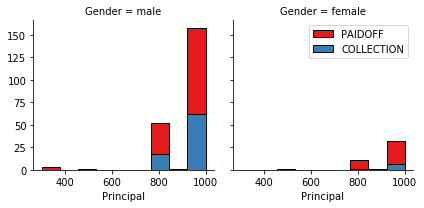

In [26]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

These charts separate the loans by Gender. Notice that most of the loan amounts are between $800-1000. In addition, there are  more loans for men versus women.

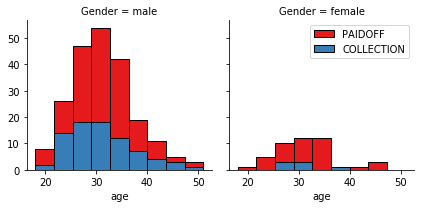

In [27]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Notice the increase in COLLECTION category in the Male barchart. Men in their 20s and 30s have high incidents of loans not being paid-off.

## Time to Explore the "Dark Art" of Feature Engineering
### We have three *incantations* to study
1. Adde iustus rudis pars (Adjusting raw features)
2. Simul rudis pars in aliquid novi (Combining raw features into something new)
3. Tabes rudis pars utibile aliis (Decomposing raw features into usable subsets)

Need Help: Save updated dataset separately from original raw to run models

## 1. Adde iustus rudis pars - Adjusting raw features
This where we could do some data cleaning: checking for missing values, renaming columns, dropping columns, etc.

In [28]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

There are no missing values in this database. If there were we would need to make a decision as to how to approach this issue. We could drop the rows with missing data or fill them with an educated guess. For example, if we were missing **age** values we could fill them with the mean age of the dataset which is 30.939306.

In [29]:
df = df.drop(columns=['Unnamed: 0','Unnamed: 0.1'], axis=1)

Remember the first two rows that were functioning as indexes of the rows? Using the drop function we were able to remove them.

In [30]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


We convert our **due_date** feature to a Pandas DateTime object so we can further manipulate this feature in the next incantation.

In [31]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


Continuing to adjust our raw features let's look at **Gender** grouped with **loan_status**.

In [32]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

Note that 87% of females repaid their loans versus 73% of males.

As we have seen, our machine learning model cannot digest the **Gender** category as a numerical value. We will convert male to 0 and female to 1.

In [33]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0


## 2. Simul rudis pars in aliquid novi (Combining raw features into something new)
Normalization, binning, one hot encoding

Let's explore this incantation with the **education** field.

In [34]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

Here's a portion of our Pandas dataframe:

In [35]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


One method of encoding categorical variables is "one-hot" encoding. This transforms an attribute into multiple columns that represent the original category numerically. For example, in **education** High School or Below will be converted into 1 when present and 0 when not.

In [36]:
# Turn education column into a one-hot encoded variable
dummy = pd.get_dummies(df['education'])
dummy.head()

,Bechalor,High School or Below,Master or Above,college
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


Let's drop the Master or Above column since there are only 2 values in the entire dataset.

In [37]:
dummy.drop(['Master or Above'],axis = 1,inplace=True)
dummy.head()

,Bechalor,High School or Below,college
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


Now let's add the one-hot encoded education columns to our dataframe

In [38]:
df = pd.concat([df,dummy],axis=1)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,Bechalor,High School or Below,college
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,0,1,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,1,0,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,0,0,1
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,0,0,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,0,0,1


Oops, do you see the problem? I left in the original education column. I need to drop that column.

In [39]:
df = df.drop(['education'], axis=1)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,Gender,Bechalor,High School or Below,college
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,0,1,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,1,1,0,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,0,0,0,1
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,1,0,0,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,0,0,0,1


## 3. Tabes rudis pars utibile aliis (Decomposing raw features into usable subsets)
Subsetting the date feature into Day of the week and weekend features.

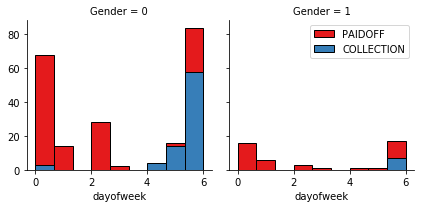

In [40]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We have created a **dayofweek** feature. Notice the bulge in the end of the week/weekend COLLECTION. It would indicate that loans taken on the weekend are less likely to be 'paidoff'. (Monday - Thursday = 0-3; Friday - Sunday = 4-6.)

In [41]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,Gender,Bechalor,High School or Below,college,dayofweek
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,0,1,0,3
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,1,1,0,0,3
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,0,0,0,1,3
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,1,0,0,1,4
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,0,0,0,1,4


In [42]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,Gender,Bechalor,High School or Below,college,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,0,1,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,1,1,0,0,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,0,0,0,1,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,1,0,0,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,0,0,0,1,4,1


This adds a **weekend** feature to our dataset.

Let's choose the final engineered features that we are going to use for our model:

In [43]:
Feature = df[['Principal','terms','age','Gender','weekend','Bechalor','High School or Below','college']]

Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [44]:
# define X and y
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [45]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Last Step: Normalize our feature data, X
"Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance)." https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
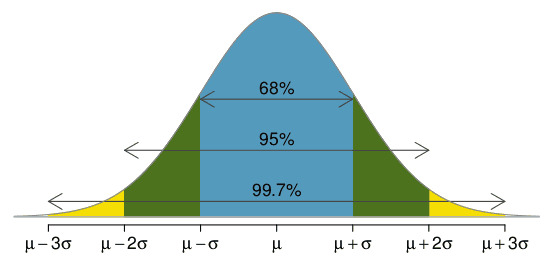

In [46]:
X_cont = X[['Principal','terms','age']] # we only want to normalize the continuous data

In [47]:
df[['Principal','terms','age']]

,Principal,terms,age
0,1000,30,45
1,1000,30,33
2,1000,15,27
3,1000,30,28
4,1000,30,29
5,1000,30,36
6,1000,30,28
7,800,15,26
8,300,7,29
9,1000,15,39


In [48]:
# z-score normalizer
X_cont= preprocessing.StandardScaler().fit(X_cont).transform(X_cont)
X_cont

array([[ 0.51578458,  0.92071769,  2.33152555],
       [ 0.51578458,  0.92071769,  0.34170148],
       [ 0.51578458, -0.95911111, -0.65321055],
       ...,
       [-1.31458942, -0.95911111,  1.33661351],
       [ 0.51578458,  0.92071769, -0.48739188],
       [ 0.51578458,  0.92071769, -0.81902922]])

In [49]:
X['Principal']  = X_cont[:,0]
X['terms']  = X_cont[:,1]
X['age']  = X_cont[:,2]

In [50]:
clf = RandomForestClassifier(n_estimators=15,criterion='entropy')
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [52]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend']=test_df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
dumm=pd.get_dummies(test_df['education'])
dumm=dumm[['Bechalor','High School or Below','college']]
test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,dumm], axis=1)
test_feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [53]:
test_cont = test_feature[['Principal','terms','age']]

In [54]:
#test_data= test_feature
test_cont= preprocessing.StandardScaler().fit(df[['Principal','terms','age']]).transform(test_cont)
y_t=test_df['loan_status']

In [55]:
test_feature['Principal']  = test_cont[:,0]
test_feature['terms']  = test_cont[:,1]
test_feature['age']  = test_cont[:,2]

In [56]:
test_feature

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,0.515785,0.920718,3.160619,1,0,1,0,0
1,-5.890524,-1.961686,0.673339,0,1,0,0,0
2,0.515785,0.920718,1.999888,1,1,0,1,0
3,0.515785,0.920718,-0.819029,0,1,0,0,1
4,-1.314589,-0.959111,-0.321573,0,1,1,0,0
5,-2.229776,-0.959111,0.341701,0,1,0,1,0
6,0.515785,-0.959111,-1.150667,0,1,0,0,1
7,0.515785,0.920718,0.175883,0,1,1,0,0
8,-1.314589,-0.959111,-0.653211,1,1,0,0,1
9,0.515785,-0.959111,1.004976,0,1,0,0,1


In [57]:
c = clf.predict(test_feature)
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(c,y_t)
accuracy

0.7592592592592593

## Feature Importances with Yellowbrick
https://www.scikit-yb.org/en/latest/api/features/importances.html

In [58]:
from yellowbrick.features.importances import FeatureImportances

In [59]:
fig = plt.figure()
ax = fig.add_subplot()

<Figure size 576x396 with 0 Axes>

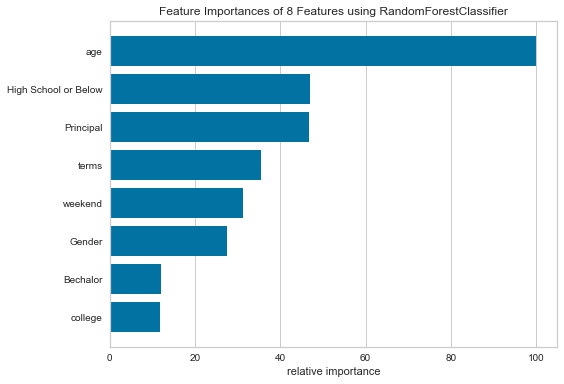

In [60]:
viz = FeatureImportances(RandomForestClassifier(), ax=ax)
viz.fit(test_feature, y_t)
viz.poof()

## Classification Report with Yellowbrick
https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

In [61]:
from yellowbrick.classifier import ClassificationReport

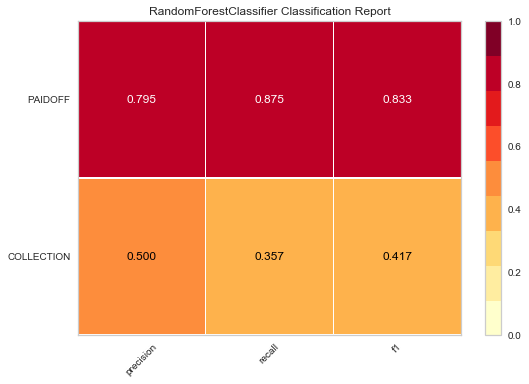

In [62]:
viz = ClassificationReport(RandomForestClassifier())
viz.fit(X, y)
viz.score(test_feature, y_t)
viz.poof()

# Resources:
**Pandas Cheat Sheet**
https://www.dataquest.io/blog/pandas-cheat-sheet/
## Automatic Feature Engineering
**tsfresh** https://tsfresh.readthedocs.io/en/latest/

**Featuretools** https://www.featuretools.com/

**autofeat** https://pypi.org/project/autofeat/